# Case study 2

In [93]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import ipympl
import scipy.stats
import numpy as np
import scipy.stats as stats
import seaborn as sns
from scipy import stats
#conda install -c conda-forge miktex in command prompt
import seaborn as sns
from ipywidgets import widgets, Layout#this is optionally, must be installed 
from IPython import display#this is optionally
from ipywidgets import widgets, Layout


In [94]:
#FOR LATEX -takes longer to run plots

plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']# all text in blots bold
#plt.rc('text', usetex=True)# for figure export 
plt.rc('text', usetex=False)# use tex for image export
PLTSCALFACTOR =1.5# change this to scale all plots labels (3 is good for export on 4k screan)
SMALL_SIZE = 12 * PLTSCALFACTOR
MEDIUM_SIZE = 13 * PLTSCALFACTOR
BIGGER_SIZE = 18 * PLTSCALFACTOR

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['lines.linewidth'] = PLTSCALFACTOR

<ipython-input-94-4c530dceca30>:4: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']# all text in blots bold


# 1. Extract the data

Data for ILC comparison is extracted from the HDF5 files separately for PTB and CEM. The extracted data will be sorted by frequency at the end of the Notebook and saved into Excel file.

In [95]:
def extract_data(filename, sensor_ID):
    #explore the HDF5 file, folders and subfolders
    with h5py.File(filename,'r') as f:
        base_items=list(f.items())
        print("\nItems in directory", base_items)
        rawtransfer=f.get("RAWTRANSFERFUNCTION")
        rawtransfer_items=list(rawtransfer.items())
        print("\nItems in reference", rawtransfer_items)
        subgroup=rawtransfer.get("/RAWTRANSFERFUNCTION/"+sensor_ID)
        subgroup_items=list(subgroup.items())
        print("\n"+sensor_ID+"items:",subgroup_items)
        subgroup_acceleration=subgroup.get("/RAWTRANSFERFUNCTION/"+sensor_ID+"/Acceleration")
        subgroup_acceleration_items=list(subgroup_acceleration.items())
        print("\nAcceleration items:",subgroup_acceleration_items)
        subgroup_acceleration_5mem=subgroup.get("/RAWTRANSFERFUNCTION/"+sensor_ID+"/Acceleration/Acceleration")
        subgroup_acceleration_5mem_items=list(subgroup_acceleration_5mem.items())
        print("\nAcceleration items_5members:", subgroup_acceleration_5mem_items)
        frequency=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_ID+"/Acceleration/Acceleration/Excitation_frequency")
        frequency_items=list(frequency.items())
        print("\nFrequency", frequency_items)
        magnitude=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_ID+"/Acceleration/Acceleration/Magnitude")
        magnitude_items=list(magnitude.items())
        print("\nMagnitude", magnitude_items)
        phase=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_ID+"/Acceleration/Acceleration/Phase")
        phase_items=list(magnitude.items())
        print("\nPhase", phase_items)
        
        
        #extract frequencies, magnitude, phase, uncertainties and all excitation parameters
        frequency_values=np.array(frequency.get("value"))
        magnitude_values=np.array(magnitude.get("value"))
        magnitude_uncertainties=np.array(magnitude.get("uncertainty"))
        phase_values=np.array(phase.get("value"))
        phase_uncertainties=np.array(phase.get("uncertainty"))
        excitation_freq_items=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_ID+"/Acceleration/Acceleration/Excitation_frequency")
        excitation_freq=np.array(excitation_freq_items.get("value"))
        excitation_amp_items=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_ID+"/Acceleration/Acceleration/Excitation_amplitude")
        excitation_amp=np.array(excitation_amp_items.get("value"))
        excitation_amp_uncertainty=np.array(excitation_amp_items.get("uncertainty"))
        
        #join all necessary data in 2D array
        total_array=np.stack((frequency_values,magnitude_values,magnitude_uncertainties,phase_values, phase_uncertainties,excitation_freq,excitation_amp,excitation_amp_uncertainty), axis=1)
        print("\nArray dimensions:", total_array.shape)
        column_names=["Frequency in Hz", r"$|S(\omega)|$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$",r"$U_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$", r"$\varphi(\omega)$ in $rad$", r"$U_{\varphi(\omega)}$ in $rad$","Excitation_freq in Hz",r"$A_{excit}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$",r"$U_{Aexcit}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]
        whole_dataset=pd.DataFrame(total_array, columns=column_names)
        f.close()
        
        
        return whole_dataset
    

In [96]:
whole_dataset_PTB = extract_data('MPU9250PTB_v5.hdf5',"0x1fe40000_MPU_9250")


Items in directory [('EXPERIMENTS', <HDF5 group "/EXPERIMENTS" (1 members)>), ('RAWDATA', <HDF5 group "/RAWDATA" (2 members)>), ('RAWTRANSFERFUNCTION', <HDF5 group "/RAWTRANSFERFUNCTION" (1 members)>), ('REFERENCEDATA', <HDF5 group "/REFERENCEDATA" (2 members)>)]

Items in reference [('0x1fe40000_MPU_9250', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250" (1 members)>)]

0x1fe40000_MPU_9250items: [('Acceleration', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/Acceleration" (1 members)>)]

Acceleration items: [('Acceleration', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/Acceleration/Acceleration" (11 members)>)]

Acceleration items_5members: [('DUT_Phase', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/Acceleration/Acceleration/DUT_Phase" (2 members)>), ('DUT_SNYNC_Phase', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/Acceleration/Acceleration/DUT_SNYNC_Phase" (2 members)>), ('DUT_amplitude', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/A

In [97]:
whole_dataset_PTB.head(2)

,Frequency in Hz,$|S(\omega)|$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$U_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$\varphi(\omega)$ in $rad$,$U_{\varphi(\omega)}$ in $rad$,Excitation_freq in Hz,$A_{excit}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$U_{Aexcit}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$
0,10.0,1.019554,0.003273,-0.094684,0.003022,10.0,2.739,0.004891
1,12.5,1.019093,0.004047,-0.118820,0.006455,12.5,2.744,0.007312


In [98]:
whole_dataset_PTB.head(2)

,Frequency in Hz,$|S(\omega)|$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$U_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$\varphi(\omega)$ in $rad$,$U_{\varphi(\omega)}$ in $rad$,Excitation_freq in Hz,$A_{excit}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$U_{Aexcit}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$
0,10.0,1.019554,0.003273,-0.094684,0.003022,10.0,2.739,0.004891
1,12.5,1.019093,0.004047,-0.118820,0.006455,12.5,2.744,0.007312


In [99]:
whole_dataset_CEM = extract_data('MPU9250CEM_v5.hdf5',"0xbccb0000_MPU_9250")


Items in directory [('EXPERIMENTS', <HDF5 group "/EXPERIMENTS" (1 members)>), ('RAWDATA', <HDF5 group "/RAWDATA" (2 members)>), ('RAWTRANSFERFUNCTION', <HDF5 group "/RAWTRANSFERFUNCTION" (1 members)>), ('REFERENCEDATA', <HDF5 group "/REFERENCEDATA" (2 members)>)]

Items in reference [('0xbccb0000_MPU_9250', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250" (1 members)>)]

0xbccb0000_MPU_9250items: [('Acceleration', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/Acceleration" (1 members)>)]

Acceleration items: [('Acceleration', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/Acceleration/Acceleration" (11 members)>)]

Acceleration items_5members: [('DUT_Phase', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/Acceleration/Acceleration/DUT_Phase" (2 members)>), ('DUT_SNYNC_Phase', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/Acceleration/Acceleration/DUT_SNYNC_Phase" (2 members)>), ('DUT_amplitude', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/A

In [100]:
whole_dataset_CEM[[r"$\varphi(\omega)$ in $rad$"]] = whole_dataset_CEM[[r"$\varphi(\omega)$ in $rad$"]]-np.pi
whole_dataset_CEM.head(2)

,Frequency in Hz,$|S(\omega)|$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$U_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$\varphi(\omega)$ in $rad$,$U_{\varphi(\omega)}$ in $rad$,Excitation_freq in Hz,$A_{excit}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$U_{Aexcit}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$
0,80.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN
1,250.0,0.643003,0.000891,-2.375412,0.002897,250.0,126.497513,0.125687


# 2. Data analysis

Cycles in CEM's dataset start with 80.0 Hz and 250.0 Hz instead of 10.0 Hz. These starting points are deleted in order to compare the cycles in a range from 10.0 Hz and 250.Hz.

In [101]:
delete_rows=[]

for k in range(0,171,19):
    i=k
    j=k+1
    delete_rows.append(i)
    delete_rows.append(j)
whole_dataset_CEM_new=whole_dataset_CEM.drop(axis=0,index=delete_rows)

In [102]:
def split_data_by_frequencies(dataset):
    dict_of_frequencies=dict(iter(dataset.groupby('Frequency in Hz')))
    return dict_of_frequencies
    #list_of_frequencies=np.array([10,12.5,16,20,25,31.5,40,46.7,50,53.3,63,80,100,125,160,200,250])

In [103]:
#check if all frequencies are the same
PTB_separated_by_freq=split_data_by_frequencies(whole_dataset_PTB)
CEM_separated_by_freq=split_data_by_frequencies(whole_dataset_CEM)
CEM_separated_by_freq_new=split_data_by_frequencies(whole_dataset_CEM_new)
print("Frequencies - PTB:",PTB_separated_by_freq.keys())
print("Frequencies - CEM:",CEM_separated_by_freq.keys())

Frequencies - PTB: dict_keys([10.0, 12.5, 16.0, 20.0, 25.0, 31.5, 40.0, 46.7, 50.0, 53.3, 63.0, 80.0, 100.0, 125.0, 160.0, 200.0, 250.0])
Frequencies - CEM: dict_keys([10.0, 12.5, 16.0, 20.0, 25.0, 31.5, 40.0, 46.7, 50.0, 53.3, 63.0, 80.0, 100.0, 125.0, 160.0, 200.0, 250.0])


In [104]:
PTB_separated_by_freq.get(10).head(1)

,Frequency in Hz,$|S(\omega)|$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$U_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$\varphi(\omega)$ in $rad$,$U_{\varphi(\omega)}$ in $rad$,Excitation_freq in Hz,$A_{excit}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$U_{Aexcit}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$
0,10.0,1.019554,0.003273,-0.094684,0.003022,10.0,2.739,0.004891


In [105]:
CEM_separated_by_freq_new.get(10).head(1)

,Frequency in Hz,$|S(\omega)|$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$U_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$\varphi(\omega)$ in $rad$,$U_{\varphi(\omega)}$ in $rad$,Excitation_freq in Hz,$A_{excit}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$U_{Aexcit}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$
2,10.0,1.016209,0.004893,-0.094907,0.001665,10.0,2.754331,0.00586


In [106]:
q_names=list(PTB_separated_by_freq.get(10).columns)
list_of_freq=[10,12.5,16,20,25,31.5,40,46.7,50,53.3,63,80,100,125,160,200,250]

In [107]:
q_names=list(PTB_separated_by_freq.get(10).columns)

# 3. En values

The En values for Magnitude, Phase and Excitation amplitude have been calculated according to formula on the figure:
$$\frac{|\bar{x}_{PTB}-\bar{x}_{CEM}|}{\sqrt{{U^{2}}_{PTB}+{U^{2}}_{CEM}}}$$



<br>$x_{PTB}$ corresponds to the mean value at a specific frequency for  PTB
<br>$x_{CEM}$ corresponds to the mean value at a specific frequency for  CEM
<br>$U_{PTB}$ corresponds to the expanded measurement uncertainty of the mean value at a specific frequency for  PTB
<br>$U_{CEM}$ corresponds to the expanded measurement uncertainty of the mean value at a specific frequency CEM
<br>If:<br> |En|<=1.1 - the criteria is satisfied (the original condition is that |En|<=1.0. However, because of the practical reasons, this limit is sometimes enlarged for 10%).
<br>|En|>1.1 - the criteria is not satisfied.
<br>The order of laboratories is not important because it affects only the sign. That is why an absolute values are taken into account. 


# 4. Case study 2: Calculate En values for estimated weighted values

Another approach refers to the weighted mean of a list of data for which each element ${\ x_{i}}$ potentially comes from a different probability distribution with known variance ${\sigma _{i}^{2}}$. In this case,  the weights are given by the reciprocal of variance [2]:

$$w_{i}={\frac {1}{\sigma _{i}^{2}}}$$

The weighted mean in this case is:

$${\bar {x}}={\frac {\sum _{i=1}^{n}\left({\dfrac {x_{i}}{\sigma _{i}^{2}}}\right)}{\sum _{i=1}^{n}{\dfrac {1}{\sigma _{i}^{2}}}}}$$,

and the standard error of the weighted mean (with variance weights) is:

$$\sigma _{\bar {x}}={\sqrt {\frac {1}{\sum _{i=1}^{n}\sigma _{i}^{-2}}}}$$

Additionally, an effective sample size (ESS) [3] has been calculated at each frequency and for each quantity as:

$$ ESS=\frac {{(\sum _{i=1}^{n} w_{i}})^{2}}{\sum _{i=1}^{n} w_{i}^{2}}$$

This approach has been applied to the magnitude and phase values at each frequency:

$${\bar {x}_{|S(\omega)|}}={\frac {\sum _{i=1}^{n}\left({\dfrac {|S(\omega)|_{i}}{\sigma _{|S(\omega)|,i}^{2}}}\right)}{\sum _{i=1}^{n}{\dfrac {1}{\sigma _{|S(\omega)|,i}^{2}}}}}$$,
,
$${\bar {x}_{\varphi(\omega)}}={\frac {\sum _{i=1}^{n}\left({\dfrac {\varphi(\omega)_{i}}{\sigma _{\varphi(\omega), i}^{2}}}\right)}{\sum _{i=1}^{n}{\dfrac {1}{\sigma _{\varphi(\omega) i}^{2}}}}}$$,


$$\sigma _{\bar{x}_{|S(\omega)|}}={\sqrt {\frac {1}{\sum _{i=1}^{n}\sigma _{|S(\omega)|,i}^{-2}}}}$$

$$\sigma _{\bar{x} {\varphi(\omega)}}={\sqrt {\frac {1}{\sum _{i=1}^{n}\sigma _{\varphi(\omega),i}^{-2}}}}$$
In both cases, *n* refers to the number of experiments at a given frequency (*n*=10 for PTB and *n*=9 for CEM).

$\sigma _{|S(\omega)|}$  for a single experiment is calculated as   $\frac{U _{|S(\omega)|}}{2}$ and $\sigma _{\varphi(\omega)}$ as $\frac{U _{\varphi(\omega)}}{2}$



## 4.1 Weighted values

In [108]:
def calculate_weighted_values(dictionary,names):
    
    weighted_val=np.empty((len(dictionary.keys()),4))
    effective_sample_size=np.empty((len(dictionary.keys()),2))
    
    for val,i in zip(dictionary.values(),range(len(dictionary.keys()))):
        weighted_val[i,0]=np.sum(val[names[1]].values*(1./(val[names[2]].values/2)**2))/np.sum(1./(val[names[2]].values/2)**2)
        weighted_val[i,1]=1./np.sqrt(np.sum(1./(val[names[2]].values/2)**2))
        effective_sample_size[i,0]=((np.sum(1./(val[names[2]].values/2)**2))**2)/np.sum(1./(val[names[2]].values/2)**4)
        
        
        weighted_val[i,2]=np.sum(val[names[3]].values*(1./(val[names[4]].values/2)**2))/np.sum(1./(val[names[4]].values/2)**2)
        weighted_val[i,3]=1./np.sqrt(np.sum(1./(val[names[4]].values/2)**2))
        effective_sample_size[i,1]=((np.sum(1./(val[names[4]].values/2)**2))**2)/np.sum(1./(val[names[4]].values/2)**4)
                     
    return weighted_val,effective_sample_size

In [109]:
weighted_values_PTB,effective_sample_size_PTB=calculate_weighted_values(PTB_separated_by_freq,q_names)
weighted_values_CEM,effective_sample_size_CEM=calculate_weighted_values(CEM_separated_by_freq_new,q_names)

column_names_list1  =[name for name in q_names if name != 'Frequency [Hz]' and name!='Excitation_freq [Hz]']
column_names_list2=[r"$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$",r"$\sigma_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$", r"$x_{wm \varphi(\omega)}$ in $rad$", r"$\sigma_{\varphi(\omega)}$ in $rad$"]

weighted_values_PTB=pd.DataFrame(weighted_values_PTB, columns=column_names_list2)
weighted_values_CEM=pd.DataFrame(weighted_values_CEM, columns=column_names_list2)

In [110]:
effective_sample_size_PTB[:1,:] #@ 10 Hz for magnitude, phase and excitation amplitude

array([[8.42642648, 9.35844012]])

In [111]:
effective_sample_size_CEM[:6,:] #@ 10 Hz for magnitude, phase and excitation amplitude

array([[7.34343223, 8.96482514],
       [8.36231102, 8.97338537],
       [5.19647767, 8.64776298],
       [8.16009879, 8.77580198],
       [6.96360866, 7.64413911],
       [8.0240504 , 7.8955576 ]])

## The overall weighted mean and standard deviation:

This approach has been applied to the magnitude and phase values at each frequency:

$${\bar {x_{|S(\omega)|,all}}}={\frac {\sum _{i=1}^{19}\left({\dfrac {|S(\omega)|_{,i}}{\sigma _{|S(\omega)|,i}^{2}}}\right)}{\sum _{i=1}^{19}{\dfrac {1}{\sigma _{|S(\omega)|,i}^{2}}}}}$$,

$${\bar {x_{\varphi(\omega),all}}}={\frac {\sum _{i=1}^{19}\left({\dfrac {\varphi(\omega)_{i}}{\sigma _{\varphi(\omega),i}^{2}}}\right)}{\sum _{i=1}^{19}{\dfrac {1}{\sigma _{\varphi(\omega),i}^{2}}}}}$$,


$$\sigma _{\bar {x_{|S(\omega)|, all}}}={\sqrt {\frac {1}{\sum _{i=1}^{19}\sigma _{|S(\omega)|,i}^{-2}}}}$$

$$\sigma _{\bar {x_{\varphi(\omega), all}}}={\sqrt {\frac {1}{\sum _{i=1}^{19}\sigma _{\varphi(\omega), i}^{-2}}}}$$
In both cases, *19* refers to the number of experiments at a given frequency (10 for PTB + 9 for CEM).

$\sigma _{|S(\omega)|}$  for a single experiment is calculated as   $\frac{U _{|S(\omega)|}}{2}$ and $\sigma _{\varphi(\omega)}$ as $\frac{U _{\varphi(\omega)}}{2}$


In [112]:
#merge all experiments for two labs in the same freqency

from collections import defaultdict
dd = defaultdict(list)
for d in (PTB_separated_by_freq, CEM_separated_by_freq_new): 
    for key, value in d.items():
        dd[key].append(value)

In [113]:
#merge all experiments for two labs in the same freqency
new=dict.fromkeys(list_of_freq, None)
for key,val in zip(list_of_freq,dd.values()):
    a=val[0]
    c=val[1]
    frames=[a,c]
    new[key] = pd.concat(frames)

Additionally, an effective sample size (ESS) [3] has been calculated at each frequency and for each quantity as:

$$ ESS_{,all}=\frac {{(\sum _{i=1}^{19} w_{i}})^{2}}{\sum _{i=1}^{19} w_{i}^{2}}$$

In [114]:
#calculate weighted mean and weighted standard deviation of all experiments
weighted_values_overall,effective_sample_size_overall=calculate_weighted_values(new,q_names)
weighted_values_overall=pd.DataFrame(weighted_values_overall, columns=column_names_list2)

In [115]:
weighted_values_PTB.head(2)

,$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$\sigma_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$x_{wm \varphi(\omega)}$ in $rad$,$\sigma_{\varphi(\omega)}$ in $rad$
0,1.019191,0.000644,-0.094700,0.000484
1,1.018506,0.000762,-0.118723,0.000766


In [116]:
weighted_values_CEM.head(2)

,$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$\sigma_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$x_{wm \varphi(\omega)}$ in $rad$,$\sigma_{\varphi(\omega)}$ in $rad$
0,1.016035,0.000591,-0.094909,0.000281
1,1.015917,0.000474,-0.118580,0.000330


In [117]:
weighted_values_overall.head(2)

,$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$\sigma_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$x_{wm \varphi(\omega)}$ in $rad$,$\sigma_{\varphi(\omega)}$ in $rad$
0,1.017477,0.000435,-0.094856,0.000243
1,1.016639,0.000402,-0.118603,0.000303


Next, the difference between the weighted mean value of PTB's setup and the overall weighted mean is calculated as:

$${\bar {x_{|S(\omega)|}}}-{\bar {x_{|S(\omega)|,all}}}$$, and
$${\bar {x_{\varphi(\omega)}}}-{\bar {x_{\varphi(\omega),all}}}$$

The same was applied for the CEM's setup.
The standard pooled deviation is then calculated as:

$$ s_{\bar {p_{|S(\omega)|}}}={\sqrt {\frac {(ESS_{|S(\omega)|}-1)*\sigma_{\bar {x_{|S(\omega)|}}}^2+(ESS_{|S(\omega)|,all}-1)*\sigma _{\bar {x_{|S(\omega)|,all}}}^2}{ESS_{|S(\omega)|}+ESS_{|S(\omega)|,all}-2}}}$$


In [118]:
#calculate the difference from the overall weighted mean

difference_mean_PTB=pd.DataFrame((weighted_values_PTB-weighted_values_overall)[r"$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"],
                                columns=[r"$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"])
difference_mean_CEM=pd.DataFrame((weighted_values_CEM-weighted_values_overall)[r"$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"],
                                 columns=[r"$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"])

In [119]:
difference_mean_PTB=difference_mean_PTB.rename(
    columns={r"$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$": r"$d_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"})
difference_mean_CEM=difference_mean_CEM.rename(
    columns={r"$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$": r"$d_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"})

In [120]:
difference_mean_PTB[r"$x_{wm \varphi(\omega)}$ in $rad$"]=(weighted_values_PTB-weighted_values_overall)[r"$x_{wm \varphi(\omega)}$ in $rad$"]
difference_mean_CEM[r"$x_{wm \varphi(\omega)}$ in $rad$"]=(weighted_values_CEM-weighted_values_overall)[r"$x_{wm \varphi(\omega)}$ in $rad$"]


In [121]:
difference_mean_PTB=difference_mean_PTB.rename(
    columns={r"$x_{wm \varphi(\omega)}$ in $rad$": r"$d_{\varphi(\omega)}$ in $rad$"})
difference_mean_CEM=difference_mean_CEM.rename(
    columns={r"$x_{wm \varphi(\omega)}$ in $rad$": r"$d_{\varphi(\omega)}$ in $rad$"})


In [122]:
effective_sample_size_PTB_1=pd.DataFrame(effective_sample_size_PTB)
effective_sample_size_overall_1=pd.DataFrame(effective_sample_size_overall)
effective_sample_size_CEM_1=pd.DataFrame(effective_sample_size_CEM)

In [123]:

s_pooled_PTB_mag=np.sqrt(((effective_sample_size_PTB_1[0]-1)*weighted_values_PTB[r"$\sigma_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"].values**2+(effective_sample_size_overall_1[0]-1)*weighted_values_overall[r"$\sigma_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"].values**2)/(effective_sample_size_PTB_1[0]+effective_sample_size_overall_1[0]-2))
s_pooled_CEM_mag=np.sqrt(((effective_sample_size_CEM_1[0]-1)*weighted_values_CEM[r"$\sigma_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"].values**2+(effective_sample_size_overall_1[0]-1)*weighted_values_overall[r"$\sigma_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"].values**2)/(effective_sample_size_CEM_1[0]+effective_sample_size_overall_1[0]-2))
s_pooled_PTB_ph=np.sqrt(((effective_sample_size_PTB_1[1]-1)*weighted_values_PTB[r"$\sigma_{\varphi(\omega)}$ in $rad$"].values**2+(effective_sample_size_overall_1[1]-1)*weighted_values_overall[r"$\sigma_{\varphi(\omega)}$ in $rad$"].values**2)/(effective_sample_size_PTB_1[1]+effective_sample_size_overall_1[1]-2))
s_pooled_CEM_ph=np.sqrt(((effective_sample_size_CEM_1[1]-1)*weighted_values_CEM[r"$\sigma_{\varphi(\omega)}$ in $rad$"].values**2+(effective_sample_size_overall_1[1]-1)*weighted_values_overall[r"$\sigma_{\varphi(\omega)}$ in $rad$"].values**2)/(effective_sample_size_CEM_1[1]+effective_sample_size_overall_1[1]-2))



t_mag_PTB=[stats.t.ppf(1-0.025, effective_sample_size_PTB_1[0][val]+effective_sample_size_overall_1[0][val]-2) for val in range(len(effective_sample_size_PTB_1[0]))]
t_mag_CEM=[stats.t.ppf(1-0.025, effective_sample_size_CEM_1[0][val]+effective_sample_size_overall_1[0][val]-2) for val in range(len(effective_sample_size_CEM_1[0]))]
t_ph_PTB=[stats.t.ppf(1-0.025, effective_sample_size_PTB_1[1][val]+effective_sample_size_overall_1[1][val]-2) for val in range(len(effective_sample_size_PTB_1[1]))]
t_ph_CEM=[stats.t.ppf(1-0.025, effective_sample_size_CEM_1[1][val]+effective_sample_size_overall_1[1][val]-2) for val in range(len(effective_sample_size_CEM_1[1]))]



The confidence interval of the difference between two population means is:
$${\bar {x_{|S(\omega)|}}}-{\bar {x_{|S(\omega)|,all}}} \pm t_{\frac{\alpha}{2}} * s_{p}*\sqrt{\frac{1}{ESS}+\frac{1}{ESS_{all}}}$$,
where $t_{\frac{\alpha}{2}}$ has $ESS+ESS_{all}-2$ degrees of freedom

In [124]:
last_mem_mag_PTB=np.sqrt(1/effective_sample_size_PTB_1[0]+1/effective_sample_size_overall_1[0])
last_mem_mag_CEM=np.sqrt(1/effective_sample_size_CEM_1[0]+1/effective_sample_size_overall_1[0])

last_mem_ph_PTB=np.sqrt(1/effective_sample_size_PTB_1[1]+1/effective_sample_size_overall_1[1])
last_mem_ph_CEM=np.sqrt(1/effective_sample_size_CEM_1[1]+1/effective_sample_size_overall_1[1])


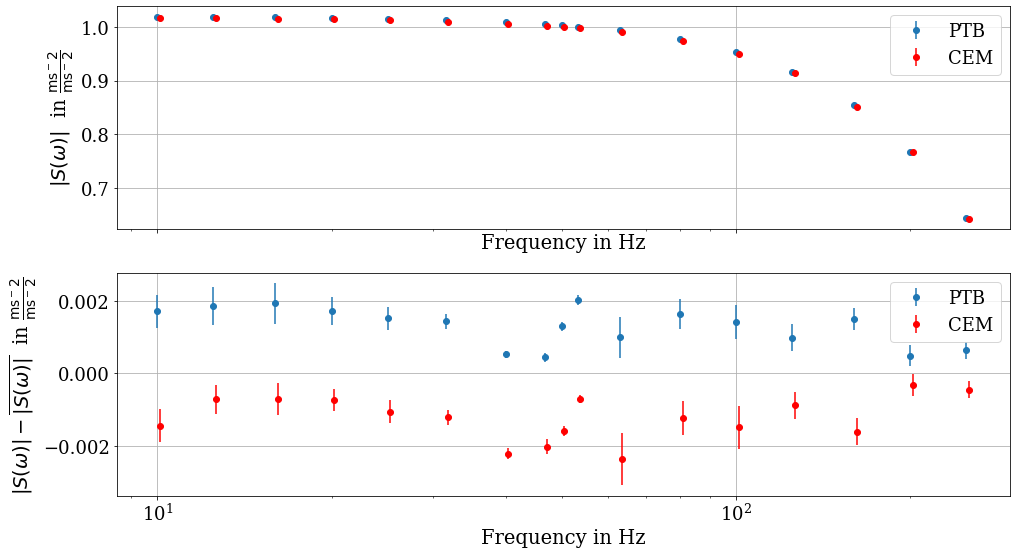

In [153]:
#%matplotlib qt    
#activate qt ploting to have interactive scaleable window with save button
fig,ax=plt.subplots(2,1,sharex="all",figsize=(16,9))#figsize=(20,10)
x=np.array(list_of_freq)
x1=x*1.01#OFFSET 1% offset to better ditinguish both labs
y= difference_mean_PTB[r"$d_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"].values
y1=difference_mean_CEM[r"$d_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"].values
yPTB=weighted_values_PTB[r"$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]
yCEM=weighted_values_CEM[r"$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]
error=s_pooled_PTB_mag*t_mag_PTB*last_mem_mag_PTB
error1=s_pooled_CEM_mag*t_mag_CEM*last_mem_mag_CEM
ax[0].errorbar(x, yPTB,yerr=error, linestyle="",marker="o",label="PTB")
ax[0].errorbar(x1, yCEM,yerr=error1, linestyle="",marker="o",label="CEM",color="red")
ax[0].set_xlabel("Frequency in Hz")
ax[0].set_ylabel(r"$|S(\omega)|$  in $\frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$")
ax[0].set_xscale('log')
ax[0].legend()
ax[0].grid()

ax[1].errorbar(x, y,yerr=error, linestyle="",marker="o",label="PTB")
ax[1].errorbar(x1, y1,yerr=error1, linestyle="",marker="o",label="CEM",color="red")
ax[1].set_xlabel("Frequency in Hz")
ax[1].set_ylabel(r"$|S(\omega)|-\overline{|S(\omega)|}$  in $\frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$")
ax[1].set_xscale('log')
ax[1].legend()
ax[1].grid() 
plt.show()

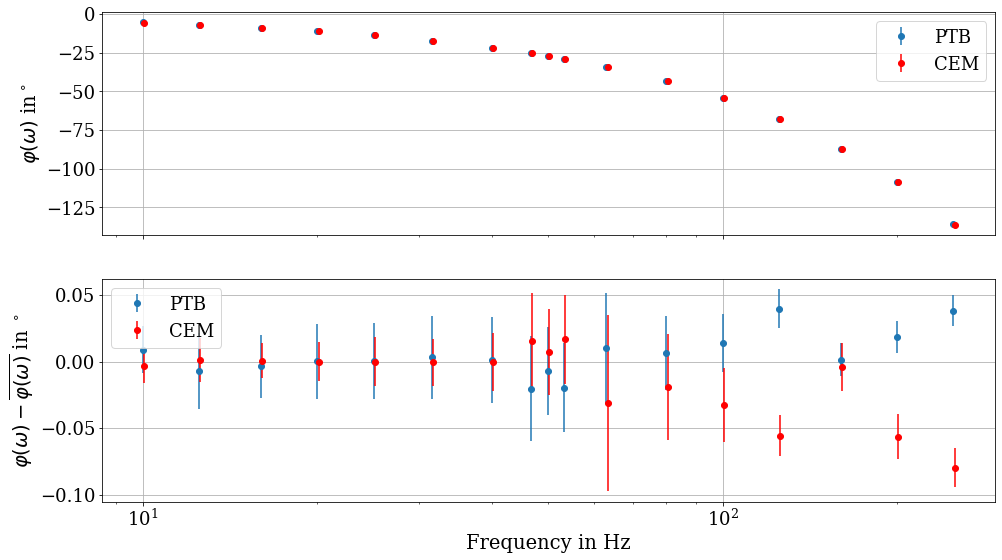

In [154]:
#%matplotlib qt  #activate qt ploting to have interactive scaleable window with save button
fig,ax=plt.subplots(2,1,sharex="all",figsize=(16,9))#figsize=(20,10)
x=np.array(list_of_freq)
x1=x*1.005#OFFSET 1% offset to better ditinguish both labs
y= difference_mean_PTB[r"$d_{\varphi(\omega)}$ in $rad$"].values
y1=difference_mean_CEM[r"$d_{\varphi(\omega)}$ in $rad$"].values
phaseRawPTB=weighted_values_PTB[r"$x_{wm \varphi(\omega)}$ in $rad$"]
phaseRawCEM=weighted_values_CEM[r"$x_{wm \varphi(\omega)}$ in $rad$"]
error=s_pooled_PTB_ph*t_ph_PTB*last_mem_ph_PTB
error1=s_pooled_CEM_ph*t_ph_CEM*last_mem_ph_CEM
ax[0].errorbar(x, np.rad2deg(phaseRawPTB),yerr=np.rad2deg(error), linestyle="",marker="o",label="PTB")
ax[0].errorbar(x1, np.rad2deg(phaseRawCEM),yerr=np.rad2deg(error1), linestyle="",marker="o",label="CEM",color="red")
ax[0].set_ylabel(r"$\varphi(\omega)$ in$^\circ$")
ax[0].set_xscale('log')
ax[0].grid() 
ax[0].legend()
ax[1].errorbar(x, np.rad2deg(y),yerr=np.rad2deg(error), linestyle="",marker="o",label="PTB")
ax[1].errorbar(x1, np.rad2deg(y1),yerr=np.rad2deg(error1), linestyle="",marker="o",label="CEM",color="red")
ax[1].set_xlabel("Frequency in Hz")
ax[1].set_ylabel(r"$\varphi(\omega) -\overline{\varphi(\omega) }$ in $^\circ$")
ax[1].set_xscale('log')
ax[1].grid() 
ax[1].legend()
plt.show()

## 4.2 En values for weighted data

In [127]:
def calculate_En_values_weighted(df1,df2,names):
    En_values=np.empty((df1.shape[0],2))
    
    for i in range (df1.shape[0]):
            En_values[:,0]=np.abs(((df1[names[0]].values-df2[names[0]].values)/(2*(np.sqrt(df1[names[1]].values**2 +df2[names[1]].values**2)))))
            En_values[:,1]=np.abs(((df1[names[2]].values-df2[names[2]].values)/(2*(np.sqrt(df1[names[3]].values**2 +df2[names[3]].values**2)))))
    return En_values  

In [128]:
weighted_values_PTB.head(2)

,$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$\sigma_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$x_{wm \varphi(\omega)}$ in $rad$,$\sigma_{\varphi(\omega)}$ in $rad$
0,1.019191,0.000644,-0.094700,0.000484
1,1.018506,0.000762,-0.118723,0.000766


In [129]:
En_values_weighted=calculate_En_values_weighted(weighted_values_PTB,weighted_values_CEM,column_names_list2)

In [130]:

plt.figure(figsize=(8,10))

sns.heatmap(En_values_weighted, vmax=2, vmin=1,annot=True,yticklabels=PTB_separated_by_freq.keys(),xticklabels=["Magnitude","Phase"] )
plt.title("En values")
plt.ylabel("Frequency in Hz")
plt.show()

#magnitudes at low freq - bad SNR 

The En values are significantly lower for the magnitude values than for the Case Study 1 (further remarks on case studies are in Conclusion), but still above the set criteria. Phase values obtain better En values, where the condition is not met on higher frequencies,or more precisely, on 125.0 hertz, 200. 0 hertz and 250.0 hertz.

# 5. A consistency test based on the CMCs

With this first result, it was of particular interest whether a full consistency could be achieved with a more complete uncertainty evaluation. Since an in-depth analysis of measurement uncertainty including relevant type B uncertainties for this particular artifact was beyond the time-frame of the project, the consistency was tested based on best measurement capabilities (CMC) of the two institutes, as they were reported for the recently published international key comparison:

PTB: magnitude 0.1% ;  phase 0.2°

CEM: magnitude 0.4% ;  phase 0.5°

all values for k=2 and valid for all frequencies in the calibration range.

In [131]:
column_names_list2=[r"$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$",r"$\sigma_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$", r"$x_{wm \varphi(\omega)}$ in $rad$", r"$\sigma_{\varphi(\omega)}$ in $rad$"]


In [132]:
#ADDING CMCs 

weighted_values_PTB[r'$x_{wm |S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$']=weighted_values_PTB[r"$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]
weighted_values_PTB[r'$\sigma_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$']=weighted_values_PTB[r"$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]*(0.1/2)/(100)
weighted_values_PTB[r'$x_{wm \varphi(\omega) - CMC}$ in $rad$']=weighted_values_PTB[r"$x_{wm \varphi(\omega)}$ in $rad$"]
weighted_values_PTB[r'$\sigma_{\varphi(\omega) - CMC}$ in $rad$']=(0.2/2)*np.pi/180



weighted_values_CEM[r'$x_{wm |S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$']=weighted_values_CEM[r"$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]
weighted_values_CEM[r'$\sigma_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$']=weighted_values_CEM[r"$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]*(0.4/2)/(100)
weighted_values_CEM[r'$x_{wm \varphi(\omega) - CMC}$ in $rad$']=weighted_values_CEM[r"$x_{wm \varphi(\omega)}$ in $rad$"]
weighted_values_CEM[r'$\sigma_{\varphi(\omega) - CMC}$ in $rad$']=(0.5/2)*np.pi/180


In [133]:
weighted_values_CEM.head(2)

,$x_{wm |S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$\sigma_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$x_{wm \varphi(\omega)}$ in $rad$,$\sigma_{\varphi(\omega)}$ in $rad$,$x_{wm |S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$\sigma_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$x_{wm \varphi(\omega) - CMC}$ in $rad$,$\sigma_{\varphi(\omega) - CMC}$ in $rad$
0,1.016035,0.000591,-0.094909,0.000281,1.016035,0.002032,-0.094909,0.004363
1,1.015917,0.000474,-0.118580,0.000330,1.015917,0.002032,-0.118580,0.004363


The reference weighted mean value is calculated on the basis of CMCs assigned to the known weighted mean values of both laboratories:

$$\bar {x_{|S(\omega)|,all}} = w_{|S(\omega)|,PTB}  \bar{x}_{|S(\omega)|, PTB} + w_{|S(\omega)|, CEM} \bar {x}_{|S(\omega)|,CEM} $$
$$\bar {x_{\varphi(\omega),all}} = w_{\varphi(\omega), PTB} \bar {x}_{\varphi(\omega),PTB} + w_{\varphi(\omega), CEM} \bar {x}_{\varphi(\omega),CEM} $$

The weights take into account absolute uncertainties (CMCs) for the magnitude and phase CMCs for phase.

The standard error is then calculated as 

$$\sigma _{\bar {x_{|S(\omega)|, all}}}={\sqrt {\frac {1}{{\sigma _{|S(\omega)|,PTB}}^{-2}+{\sigma _{|S(\omega)|,CEM}}^{-2}}}}$$
$$\sigma _{\bar {x_{\varphi(\omega), all}}}={\sqrt {\frac {1}{{\sigma _{\varphi(\omega),PTB}}^{-2}+{\sigma _{\varphi(\omega),CEM}}^{-2}}}}$$


In [134]:
names1=weighted_values_PTB.columns

weighted_values_overall[r'$x_{wm |S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$']=(weighted_values_PTB[names1[4]].values*(1./(weighted_values_PTB[names1[5]].values)**2)+weighted_values_CEM[names1[4]].values*(1./(weighted_values_CEM[names1[5]].values)**2))/((1./(weighted_values_PTB[names1[5]].values)**2)+(1./(weighted_values_CEM[names1[5]].values)**2))
weighted_values_overall[r'$x_{wm \varphi(\omega) - CMC}$ in $rad$']=(weighted_values_PTB[names1[6]].values*(1./(weighted_values_PTB[names1[7]].values)**2)+weighted_values_CEM[names1[6]].values*(1./(weighted_values_CEM[names1[7]].values)**2))/((1./(weighted_values_PTB[names1[7]].values)**2)+(1./(weighted_values_CEM[names1[7]].values)**2))

weighted_values_overall[r'$\sigma_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$']=np.sqrt(1/((1./(weighted_values_PTB[names1[5]].values)**2)+(1./(weighted_values_CEM[names1[5]].values)**2)))
weighted_values_overall[r'$\sigma_{\varphi(\omega) - CMC}$ in $rad$']=np.sqrt(1./((1./(weighted_values_PTB[names1[7]].values)**2)+(1./(weighted_values_CEM[names1[7]].values)**2)))            


In [135]:
difference_mean_PTB.head(2)

,$d_{|S(\omega)|}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$,$d_{\varphi(\omega)}$ in $rad$
0,0.001715,0.000156
1,0.001866,-0.000121


The difference is then calculated as:
$$ d_{|S(\omega)|}= {\bar {x_{|S(\omega)|}}}-{\bar {x_{|S(\omega)|,all}}}$$, and
$$ d_{\varphi(\omega)}={\bar {x_{\varphi(\omega)}}}-{\bar {x_{\varphi(\omega),all}}}$$
and the uncertainty as:
$$ u_{d,|S(\omega)|}= \sqrt{{\sigma _{|S(\omega)|}}^{2}-{\sigma _{|S(\omega)|,all}}^{2}}$$, and
$$ u_{d,\varphi(\omega)}=\sqrt{{\sigma _{\varphi(\omega)}}^{2}-{\sigma _{\varphi(\omega),all}}^{2}}$$ 

In [136]:
# difference CMC
difference_mean_PTB_cmc=pd.DataFrame((weighted_values_PTB-weighted_values_overall)[r'$x_{wm |S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$'],columns=[r'$x_{wm |S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$'])
difference_mean_CEM_cmc=pd.DataFrame((weighted_values_CEM-weighted_values_overall)[r'$x_{wm |S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$'],columns=[r'$x_{wm |S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$'])

In [137]:
difference_mean_PTB_cmc=difference_mean_PTB_cmc.rename(
    columns={r'$x_{wm |S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$': r"$d_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"})
difference_mean_CEM_cmc=difference_mean_CEM_cmc.rename(
    columns={r'$x_{wm |S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$': r"$d_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"})


In [138]:
#CMC
difference_mean_PTB_cmc[r'$x_{wm \varphi(\omega) - CMC}$ in $rad$']=(weighted_values_PTB-weighted_values_overall)[r'$x_{wm \varphi(\omega) - CMC}$ in $rad$']
difference_mean_CEM_cmc[r'$x_{wm \varphi(\omega) - CMC}$ in $rad$']=(weighted_values_CEM-weighted_values_overall)[r'$x_{wm \varphi(\omega) - CMC}$ in $rad$']

In [139]:
difference_mean_PTB_cmc=difference_mean_PTB_cmc.rename(
    columns={r'$x_{wm \varphi(\omega) - CMC}$ in $rad$': r"$d_{\varphi(\omega) - CMC}$ in $rad$"})
difference_mean_CEM_cmc=difference_mean_CEM_cmc.rename(
    columns={r'$x_{wm \varphi(\omega) - CMC}$ in $rad$': r"$d_{\varphi(\omega) - CMC}$ in $rad$"})

According to convention, the results are considered consistent, if the expanded uncertainty of the deviation is larger than the deviation from the weighted mean, which can be expressed in terms of the En-value as:

$$ E_{N}=\frac {d}{2u_{d}}<1.0$$ 

Note that this equation isdifferent from the previous one because the calculated difference in the nominator is between a laboratory and a reference weighted mean.In the previous case it was calculated between two laboratories [4]. 

In [140]:
#degree of equivalence

DOE_PTB_mag= pd.DataFrame(difference_mean_PTB_cmc[r"$d_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"])
DOE_PTB_mag[r"$u_{di}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]=np.sqrt((weighted_values_PTB[r'$\sigma_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$'].values)**2-weighted_values_overall[r'$\sigma_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$'].values**2)
DOE_PTB_mag[r"$E_{N}$"]=DOE_PTB_mag[r"$d_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]/(2*DOE_PTB_mag[r"$u_{di}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"])

DOE_CEM_mag= pd.DataFrame(difference_mean_CEM_cmc[r"$d_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"])
DOE_CEM_mag[r"$u_{di}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]=np.sqrt((weighted_values_CEM[r'$\sigma_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$'].values)**2-weighted_values_overall[r'$\sigma_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$'].values**2)
DOE_CEM_mag[r"$E_{N}$"]=DOE_CEM_mag[r"$d_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]/(2*DOE_CEM_mag[r"$u_{di}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"])

In [141]:
paper_columns=[r"$d_{i} in \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$",r"$u_{di}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$",r"$E_{N}$"]
DOE_PTB_mag.columns= paper_columns
DOE_CEM_mag.columns= paper_columns

Uncertainties expressed as relative:

In [142]:
relative_udi_PTB=np.abs((DOE_PTB_mag[r"$u_{di}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]/DOE_PTB_mag[r"$d_{i} in \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"])*100)
relative_udi_CEM=np.abs((DOE_CEM_mag[r"$u_{di}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]/DOE_CEM_mag[r"$d_{i} in \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"])*100)
DOE_PTB_mag.insert(2,r"$u_{di}$ in $\%$",relative_udi_PTB)
DOE_CEM_mag.insert(2,r"$u_{di}$ in $\%$",relative_udi_CEM)

In [143]:
paper_results_mag=pd.concat([DOE_PTB_mag,DOE_CEM_mag],axis=1)
paper_results_mag.insert(0,r"$x_{wm}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$",weighted_values_overall[r'$x_{wm |S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$'])
paper_results_mag.insert(1,r"$u_{wm}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$",weighted_values_overall[r'$\sigma_{|S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$'])

In [144]:
relative_wx=(paper_results_mag[r"$u_{wm}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]/paper_results_mag[r"$x_{wm}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"])*100
paper_results_mag.insert(2,r"$u_{wm}$ in $ \%$",relative_wx)

In [145]:
paper_results_mag=paper_results_mag.set_axis(list_of_freq)

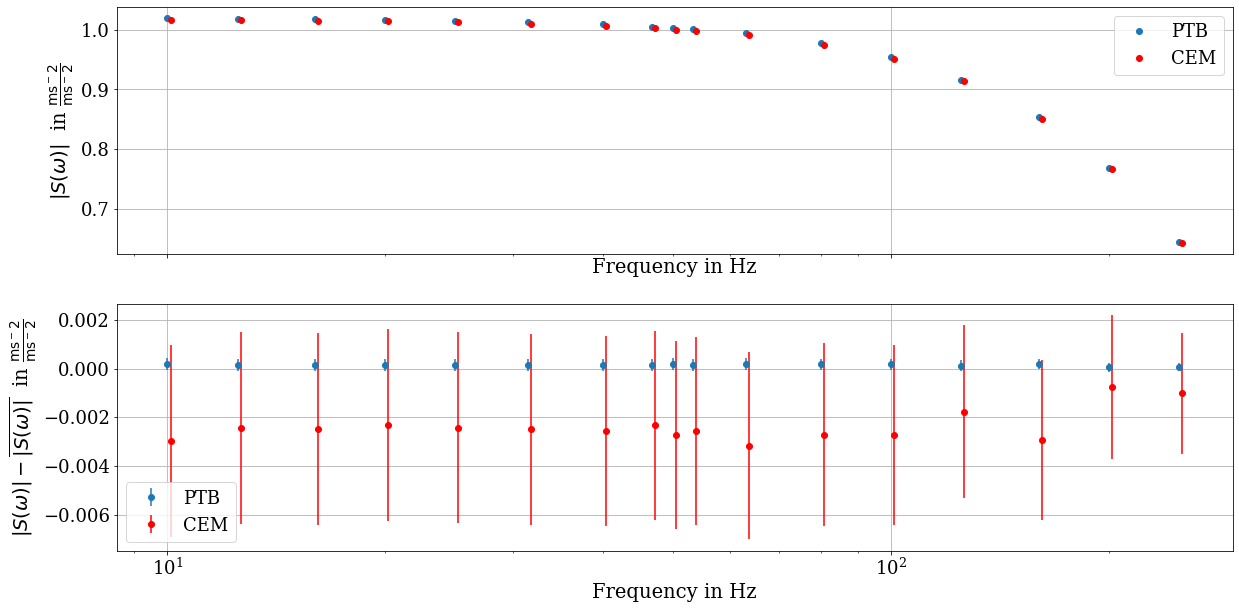

In [146]:
%matplotlib inline
#%matplotlib qt    
#activate qt ploting to have interactive scaleable window with save button
fig,ax=plt.subplots(2,1,sharex="all",figsize=(20,10))#figsize=(20,10)
x=np.array(list_of_freq)
x1=x*1.01#OFFSET 1% offset to better ditinguish both labs
y= DOE_PTB_mag[r"$d_{i} in \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"].values
y1=DOE_CEM_mag[r"$d_{i} in \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"].values
yPTB=weighted_values_PTB[r"$x_{wm |S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]
yCEM=weighted_values_CEM[r"$x_{wm |S(\omega)|- CMC}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]
error_mag_PTB=DOE_PTB_mag[r"$u_{di}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]*2
#s_pooled_PTB_mag_CMC*t_mag_PTB_CMC*last_mem_mag_PTB_CMC
error_mag_CEM=DOE_CEM_mag[r"$u_{di}$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$"]*2
#s_pooled_CEM_mag_CMC*t_mag_CEM_CMC*last_mem_mag_CEM_CMC
ax[0].plot(x, yPTB, linestyle="",marker="o",label="PTB")
ax[0].plot(x1, yCEM, linestyle="",marker="o",label="CEM",color="red")
ax[0].set_xlabel("Frequency in Hz")
ax[0].set_ylabel(r"$|S(\omega)|$  in $\frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$")
ax[0].set_xscale('log')
ax[0].legend()
ax[0].grid()

ax[1].errorbar(x, y,yerr=error_mag_PTB, linestyle="",marker="o",label="PTB")
ax[1].errorbar(x1, y1,yerr=error_mag_CEM, linestyle="",marker="o",label="CEM",color="red")
ax[1].set_xlabel("Frequency in Hz")
ax[1].set_ylabel(r"$|S(\omega)|-\overline{|S(\omega)|}$  in $\frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$")
ax[1].set_xscale('log')
ax[1].legend()
ax[1].grid() 
plt.show()

The same procedure is used for the phase values:

In [147]:
#degree of equivalence - phase
DOE_PTB_ph= pd.DataFrame(np.rad2deg(difference_mean_PTB_cmc[r"$d_{\varphi(\omega) - CMC}$ in $rad$"].values),columns=[r"$d_{i}$ in $^\circ$"])
DOE_PTB_ph[r"$u_{di}$ in $^\circ$"]=np.rad2deg(np.sqrt((weighted_values_PTB[r'$\sigma_{\varphi(\omega) - CMC}$ in $rad$'].values)**2-weighted_values_overall[r'$\sigma_{\varphi(\omega) - CMC}$ in $rad$'].values**2))
DOE_PTB_ph[r"$E_{N}$"]=DOE_PTB_ph[r"$d_{i}$ in $^\circ$"]/(2*DOE_PTB_ph[r"$u_{di}$ in $^\circ$"])

DOE_CEM_ph= pd.DataFrame(np.rad2deg(difference_mean_CEM_cmc[r"$d_{\varphi(\omega) - CMC}$ in $rad$"].values),columns=[r"$d_{i}$ in $^\circ$"])
DOE_CEM_ph[r"$u_{di}$ in $^\circ$"]=np.rad2deg(np.sqrt((weighted_values_CEM[r'$\sigma_{\varphi(\omega) - CMC}$ in $rad$'].values)**2-weighted_values_overall[r'$\sigma_{\varphi(\omega) - CMC}$ in $rad$'].values**2))
DOE_CEM_ph[r"$E_{N}$"]=DOE_CEM_ph[r"$d_{i}$ in $^\circ$"]/(2*DOE_CEM_ph[r"$u_{di}$ in $^\circ$"])

In [148]:
paper_columns1=[r"$d_{i}$ in $^\circ$",r"$u_{di}$ in $^\circ$",r"$E_{N}$"]
DOE_PTB_ph.columns= paper_columns1
DOE_CEM_ph.columns= paper_columns1

In [149]:
paper_results_ph=pd.concat([DOE_PTB_ph,DOE_CEM_ph],axis=1)
paper_results_ph.insert(0,r"$x_{wm}$ in $^\circ$",np.rad2deg(weighted_values_overall[r'$x_{wm \varphi(\omega) - CMC}$ in $rad$'].values))
paper_results_ph.insert(1,r"$u_{wm}$ in $^\circ$",np.rad2deg(weighted_values_overall[r'$\sigma_{\varphi(\omega) - CMC}$ in $rad$']))

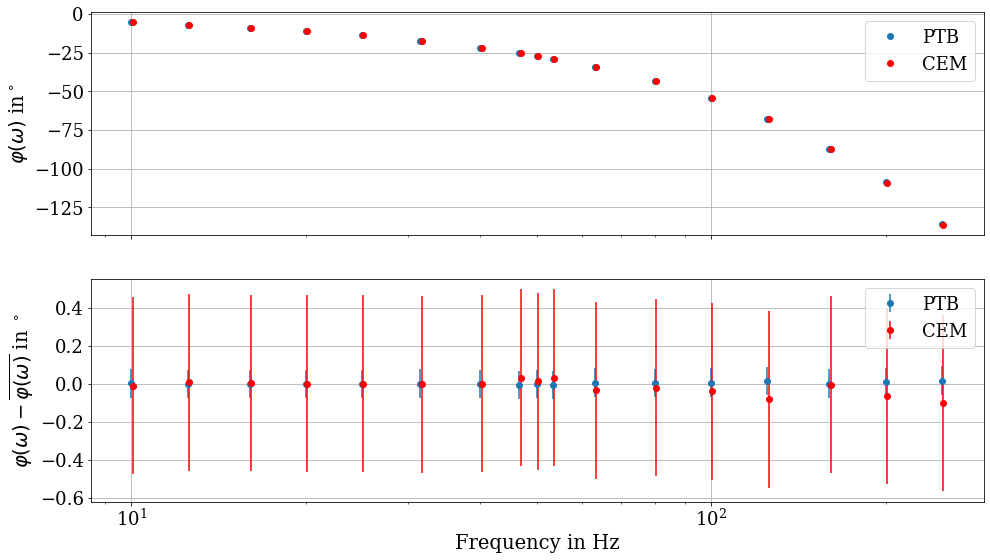

In [150]:
#%matplotlib qt  
#activate qt ploting to have interactive scaleable window with save button
fig,ax=plt.subplots(2,1,sharex="all",figsize=(16,9))#figsize=(20,10)
x=np.array(list_of_freq)
x1=x*1.005#OFFSET 1% offset to better ditinguish both labs
y= DOE_PTB_ph[r"$d_{i}$ in $^\circ$"].values
y1=DOE_CEM_ph[r"$d_{i}$ in $^\circ$"].values
phaseRawPTB=weighted_values_PTB[r"$x_{wm \varphi(\omega) - CMC}$ in $rad$"]
phaseRawCEM=weighted_values_CEM[r"$x_{wm \varphi(\omega) - CMC}$ in $rad$"]
error_ph_PTB=DOE_PTB_ph[r"$u_{di}$ in $^\circ$"]*2
#s_pooled_PTB_ph_CMC*t_ph_PTB_CMC*last_mem_ph_PTB_CMC
error_ph_CEM=DOE_CEM_ph[r"$u_{di}$ in $^\circ$"]*2
ax[0].plot(x, np.rad2deg(phaseRawPTB), linestyle="",marker="o",label="PTB")
ax[0].plot(x1, np.rad2deg(phaseRawCEM), linestyle="",marker="o",label="CEM",color="red")
ax[0].set_ylabel(r"$\varphi(\omega)$ in$^\circ$")
ax[0].set_xscale('log')
ax[0].grid() 
ax[0].legend()
ax[1].errorbar(x, y,yerr=error_ph_PTB, linestyle="",marker="o",label="PTB")
ax[1].errorbar(x1, y1,yerr=error_ph_CEM, linestyle="",marker="o",label="CEM",color="red")
ax[1].set_xlabel("Frequency in Hz")
ax[1].set_ylabel(r"$\varphi(\omega) -\overline{\varphi(\omega) }$ in $^\circ$")
ax[1].set_xscale('log')
ax[1].grid() 
ax[1].legend()
plt.show()

In [151]:
DOE_PTB_ph.head(2)

,$d_{i}$ in $^\circ$,$u_{di}$ in $^\circ$,$E_{N}$
0,0.001650,0.037139,0.022215
1,-0.001131,0.037139,-0.015225


The En values are below 1 for both quantities, which is in accordance with the plots.

In [152]:
paper_results_ph=paper_results_ph.set_axis(list_of_freq)
writer2 = pd.ExcelWriter('Results.xlsx')
paper_results_mag.to_excel(writer2,sheet_name = "Magnitude", index=True)
paper_results_ph.to_excel(writer2,sheet_name = "Phase", index=True)
writer2.save()

# References

https://www.investopedia.com/terms/c/coefficientofvariation.asp
<br>https://en.wikipedia.org/wiki/Weighted_arithmetic_mean
<br>https://en.wikipedia.org/wiki/Effective_sample_size
<br>https://online.stat.psu.edu/stat500/lesson/10/10.2/10.2.1
<br>https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/
<br>https://en.wikipedia.org/wiki/Weighted_arithmetic_mean
<br>https://en.wikipedia.org/wiki/Effective_sample_size
<br>https://online.stat.psu.edu/stat500/lesson/10/10.2/10.2.1
<br>https://iopscience.iop.org/article/10.1088/0026-1394/39/6/10